In [1]:
# Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a 
# strong majority-minority distribution (e.g. 96%-4%). 
# Then solve again the classification task adopting the various techniques studied (or new ones).

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dataset con attributi originali
df = pd.read_csv("dataset_All_normalized.csv")
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

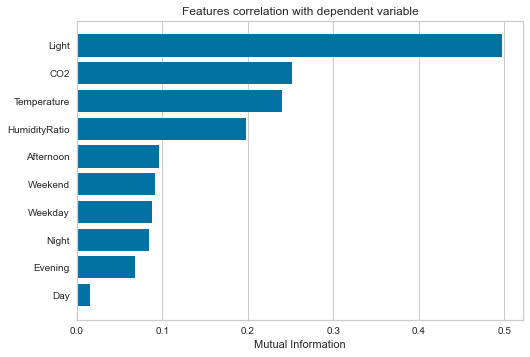

In [16]:
from yellowbrick.target import FeatureCorrelation
# Feature correlation (** requires dataframe and 1D target vector)
attributes = [col for col in df.columns if col != class_name]
X = df[attributes]
y = df[class_name]
feature_correlation = FeatureCorrelation(method='mutual_info-classification',
                                         feature_names=attributes, sort=True)
feature_correlation.fit(X, y)
feature_correlation.show()

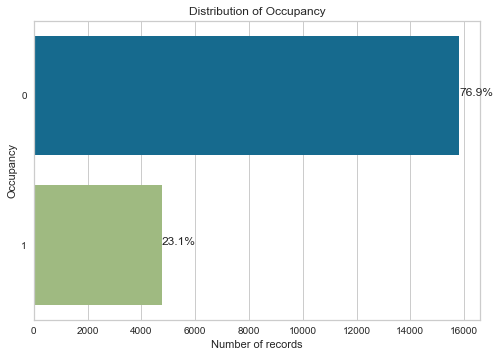

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]
ax = sns.countplot(y="Occupancy", data=df)
plt.title('Distribution of Occupancy')
plt.xlabel('Number of records')
total = len(df['Occupancy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

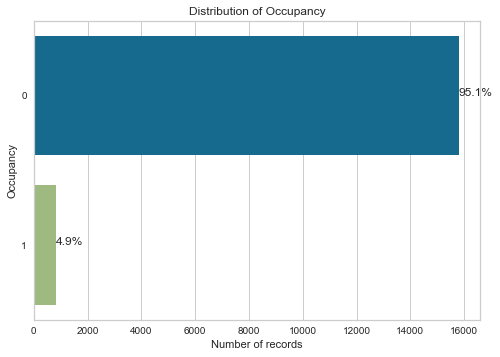

In [37]:
from imblearn.datasets import make_imbalance
seed = 100
attributes = [col for col in df.columns if col != class_name]
X = df[attributes]
y = df[class_name]
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 15810, 1: 822}, random_state=seed)
#plt.title('Imbalanced dataset')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
#           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
#plt.show()
df2=pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
attr= [col for col in df.columns]
df2.columns = attr
ax = sns.countplot(y="Occupancy", data=df2)
plt.title('Distribution of Occupancy')
plt.xlabel('Number of records')
total = len(df2['Occupancy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [37]:
"""Il sottocampionamento è il processo in cui si eliminano casualmente alcune osservazioni dalla classe 
 di maggioranza al fine di abbinare i numeri con la classe di minoranza. """

'Il sottocampionamento è il processo in cui si eliminano casualmente alcune osservazioni dalla classe \n di maggioranza al fine di abbinare i numeri con la classe di minoranza. '

In [39]:
# Divide by class
df_class_0 = df[df['Occupancy'] == 0]
df_class_1 = df[df['Occupancy'] == 1]

In [41]:
X_0 = df_class_0[attributes]
X_1 = df_class_1[attributes]

In [42]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, shuffle=True, noise=0.5, random_state=10)


In [57]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

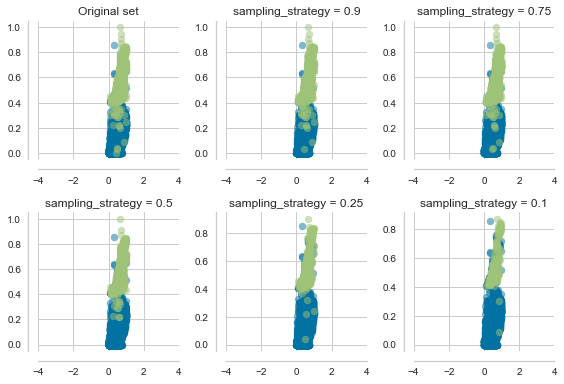

In [58]:
from collections import Counter
def plot_decoration(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-4, 4])


# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 3)

axs = [a for ax in axs for a in ax]

axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
axs[0].set_title('Original set')
plot_decoration(axs[0])


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

doup_list = []
multipliers = [0.9, 0.75, 0.5, 0.25, 0.1]
for i, multiplier in enumerate(multipliers, start=1):
    ax = axs[i]

    X_, y_ = make_imbalance(X, y, sampling_strategy=ratio_func,
                            **{"multiplier": multiplier,
                               "minority_class": 1})
    ax.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5)
    ax.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title('sampling_strategy = {}'.format(multiplier))
    plot_decoration(ax)
    doup_list.append((X_,y_))

plt.tight_layout()
plt.show()

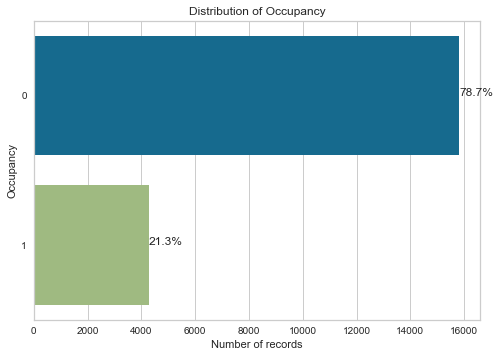

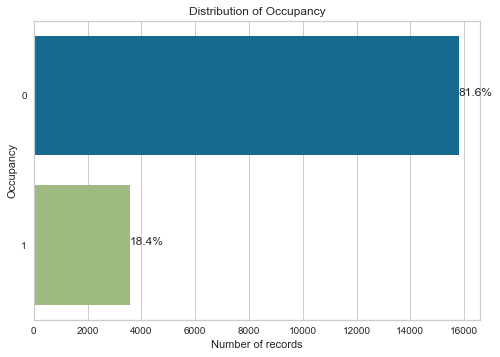

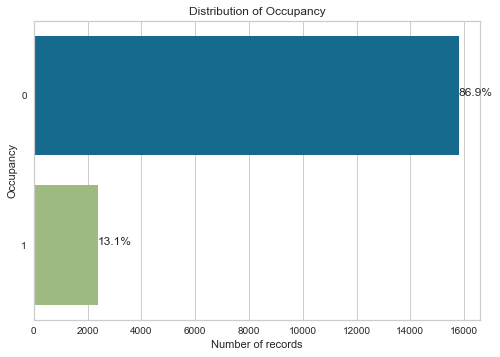

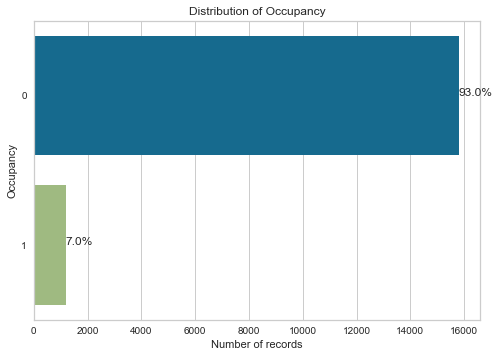

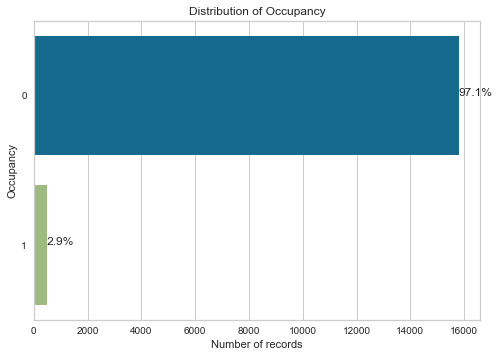

In [61]:
for i, j in doup_list:
    df2=pd.concat([pd.DataFrame(i), pd.DataFrame(j)], axis=1)
    attr= [col for col in df.columns]
    df2.columns = attr
    ax = sns.countplot(y="Occupancy", data=df2)
    plt.title('Distribution of Occupancy')
    plt.xlabel('Number of records')
    total = len(df2['Occupancy'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))

    plt.show()

In [ ]:
# https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [61]:
#https://github.com/scikit-learn-contrib/imbalanced-learn

# Prove con lo sbilanciamento

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [64]:
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)    
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)    
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)   
    print("____________________________________________")    

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")    

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")   
    
    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall, 
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")   
    
    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))
    
    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [65]:
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")
    fprate, tprate, threashold = roc_curve(y_test, y_score[:, 1])
    auc_score = auc(fprate, tprate)
    plt.plot(fprate, tprate, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")    
    print(roc_auc_score(y_test, y_score[:,1]))    
    
    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()
    
    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()
    

    print("____________________________________")
    print("****** Cumulative gain: con metodo diretto *******")
    plot_cumulative_gain(y_test, y_score)
    plt.show()
    
    
    print("____________________________________")
    print("****** Lift curve: con metodo diretto *******")    
    plot_lift_curve(y_test, y_score)
    plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

#Funzione per plottare 
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def plot_decision_knn(X, y):
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=5)
    title = "Learning Curves KNN "
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=5, min_samples_split=50)
    title = "Learning Curves DecisionTree"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    plt.show()

def plot_gauss(X, y):
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = GaussianNB()
    title = "Learning Curves Gauss"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    X = df[['Light', 'CO2', 'HumidityRatio', 'Day']].values
    y = df[class_name]
    estimator = GaussianNB()
    title = "Learning Curves Gauss"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

In [73]:
X, y = doup_list[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

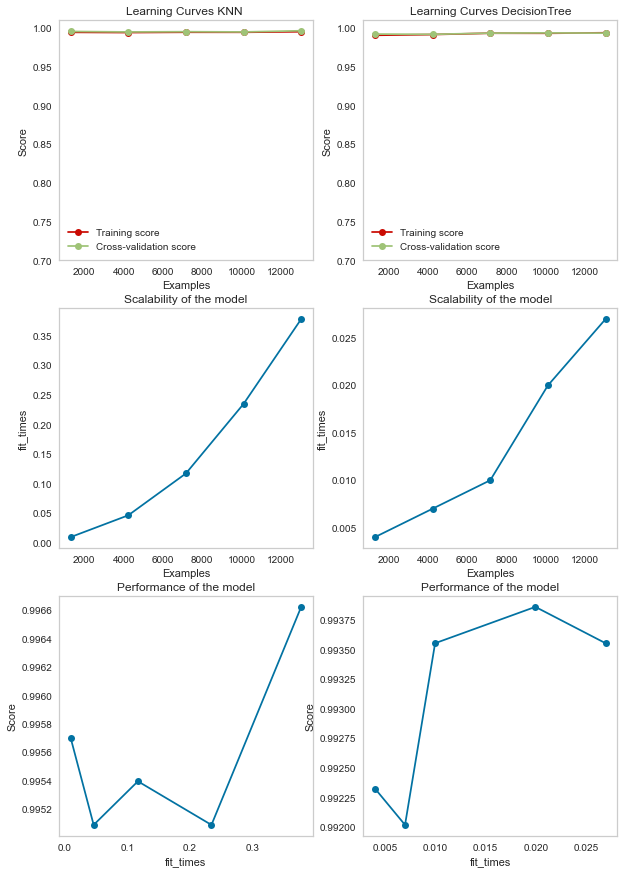

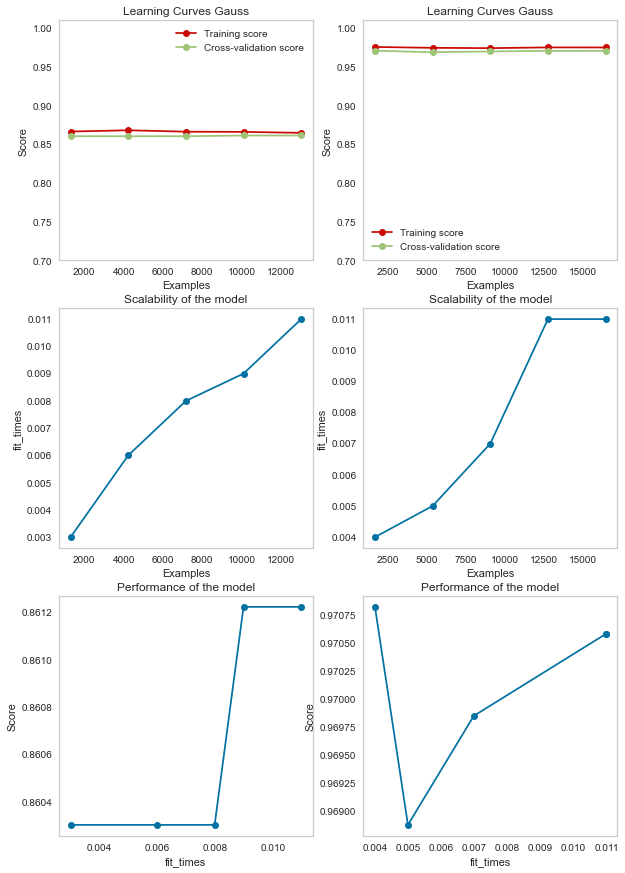

In [74]:
plot_decision_knn(X, y)
plot_gauss(X, y)

**** Matrice di Confusione *****
 True negative: 4735 False negative: 19
 True positive: 124 False positive: 8
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9945
Numero di campioni correttamente correlati:  4859
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9394
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.8671
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9983
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9018
____________________________________________
              precision    recall  f1-score   s

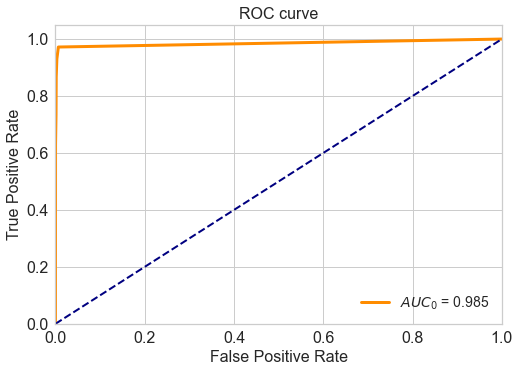

____________________________________
****** VALORE DI AUC *******
0.9852266645435526
____________________________________
****** ROC CURVE: con metodo diretto *******


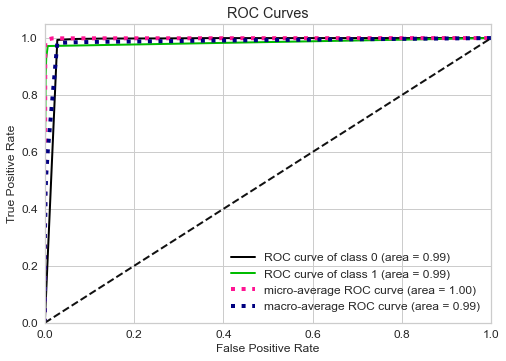

____________________________________
****** Precision recall: con metodo diretto *******


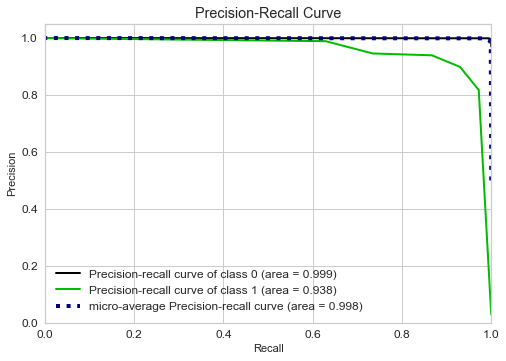

____________________________________
****** Cumulative gain: con metodo diretto *******


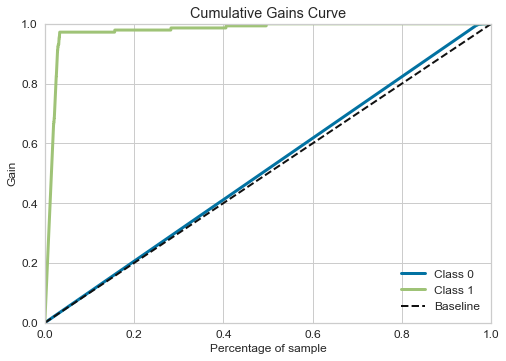

____________________________________
****** Lift curve: con metodo diretto *******


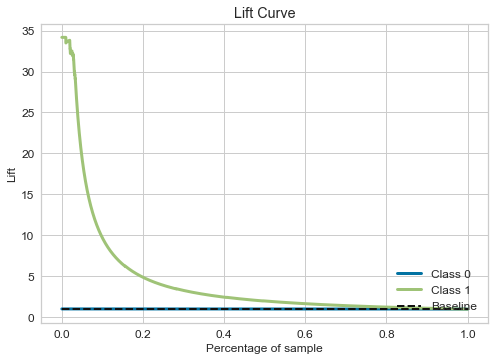

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
result_pred(y_test, y_pred)
y_score = knn.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

**** Matrice di Confusione *****
 True negative: 4071 False negative: 0
 True positive: 143 False positive: 672
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8625
Numero di campioni correttamente correlati:  4214
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.1755
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8583
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.2985
____________________________________________
              precision    recall  f1-score   

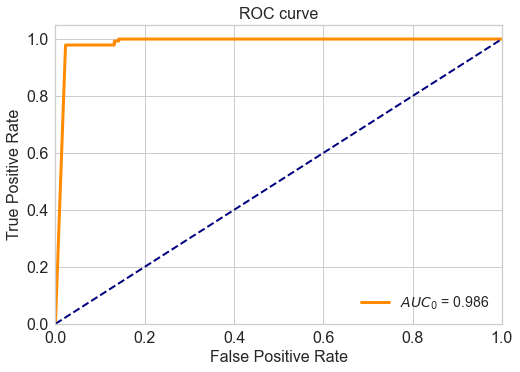

____________________________________
****** VALORE DI AUC *******
0.9861216161026408
____________________________________
****** ROC CURVE: con metodo diretto *******


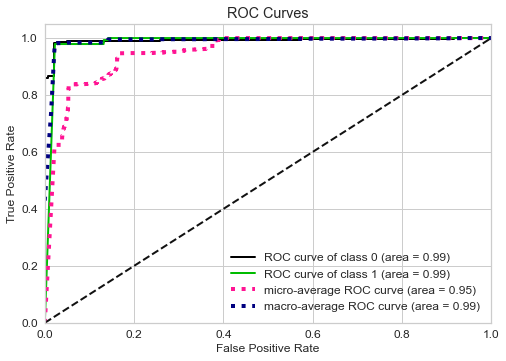

____________________________________
****** Precision recall: con metodo diretto *******


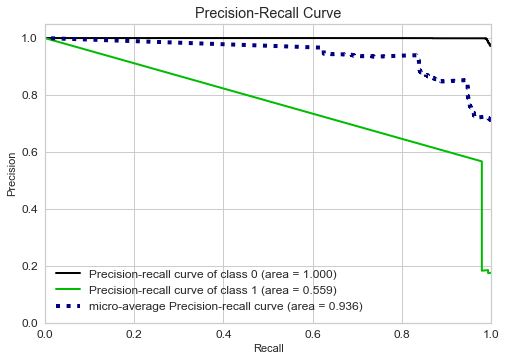

____________________________________
****** Cumulative gain: con metodo diretto *******


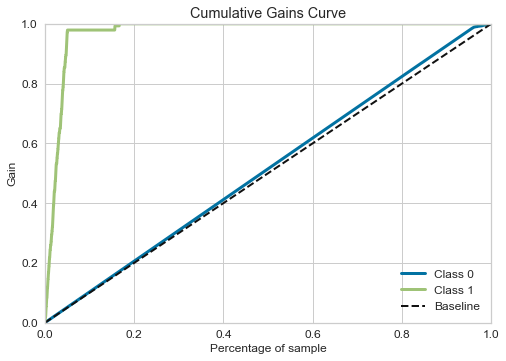

____________________________________
****** Lift curve: con metodo diretto *******


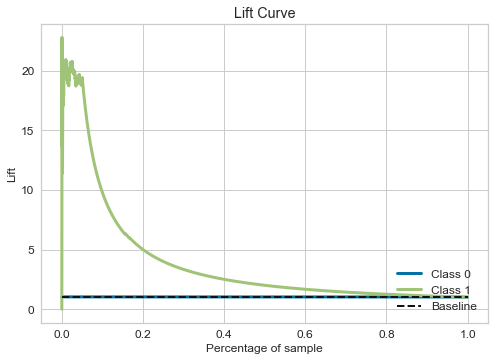

In [76]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
result_pred(y_test, y_pred)
y_score = gauss.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

**** Matrice di Confusione *****
 True negative: 4728 False negative: 22
 True positive: 121 False positive: 15
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9924
Numero di campioni correttamente correlati:  4849
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.8897
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.8462
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9968
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.8674
____________________________________________
              precision    recall  f1-score   

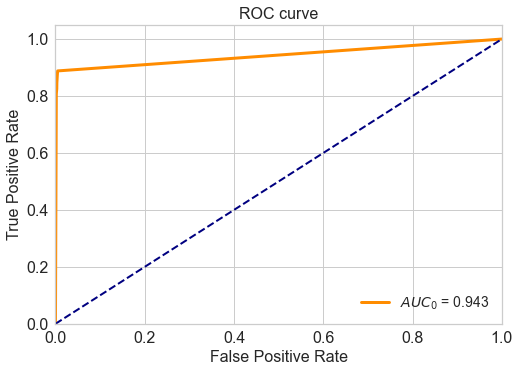

____________________________________
****** VALORE DI AUC *******
0.9427415300280576
____________________________________
****** ROC CURVE: con metodo diretto *******


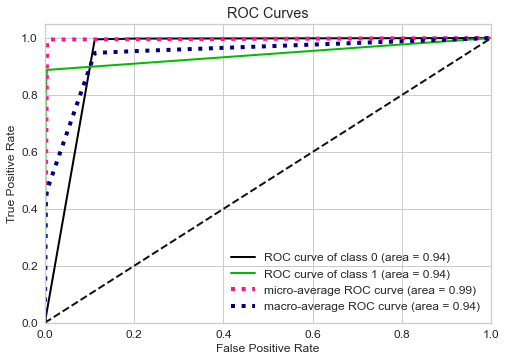

____________________________________
****** Precision recall: con metodo diretto *******


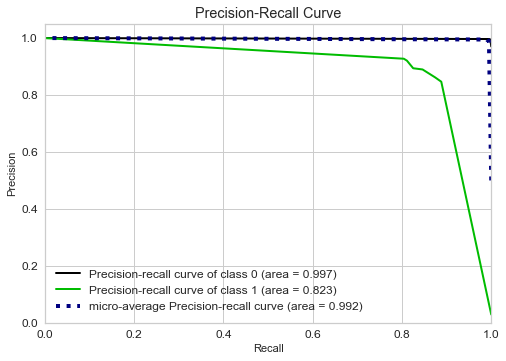

____________________________________
****** Cumulative gain: con metodo diretto *******


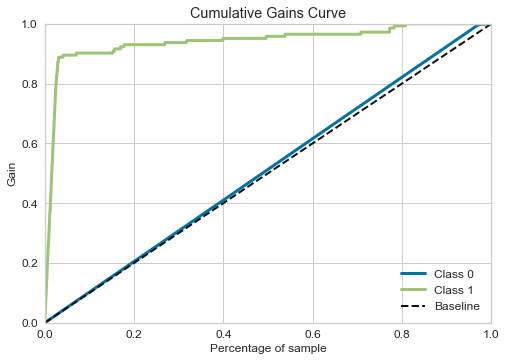

____________________________________
****** Lift curve: con metodo diretto *******


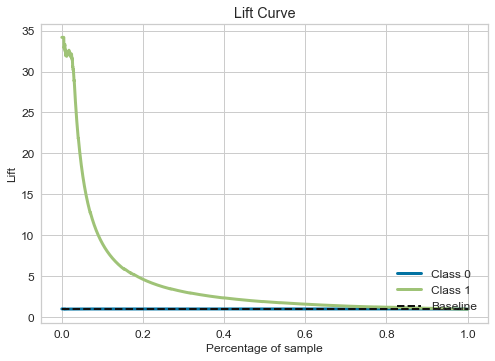

In [77]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result_pred(y_test, y_pred)
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

# Logistic Regression

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from scipy.special import expit

In [79]:
# penalty = 'l2', penalty = 'l1', penalty = 'l2', penalty = 'elasticnet'
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.99
Accuracy 0.9864920180106427
F1-score [0.99302768 0.78431373]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.74      0.84      0.78       143

    accuracy                           0.99      4886
   macro avg       0.87      0.92      0.89      4886
weighted avg       0.99      0.99      0.99      4886

[[4700   43]
 [  23  120]]


In [80]:
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4700 False negative: 23
 True positive: 120 False positive: 43
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9865
Numero di campioni correttamente correlati:  4820
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.7362
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.8392
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9909
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.7843
____________________________________________
              precision    recall  f1-score   

****** ROC CURVE + AUC?: passo passo *******


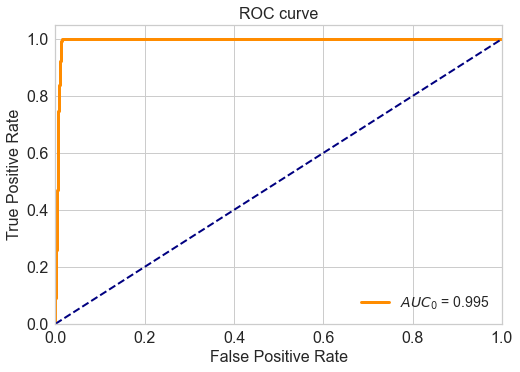

____________________________________
****** VALORE DI AUC *******
0.9949177956768089
____________________________________
****** ROC CURVE: con metodo diretto *******


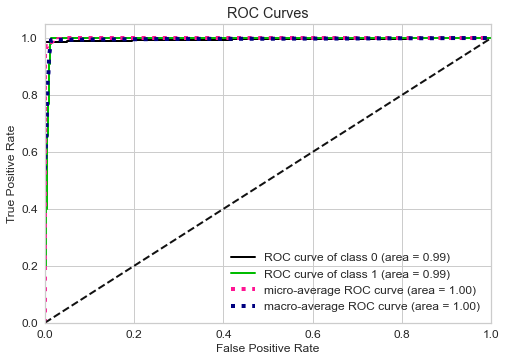

____________________________________
****** Precision recall: con metodo diretto *******


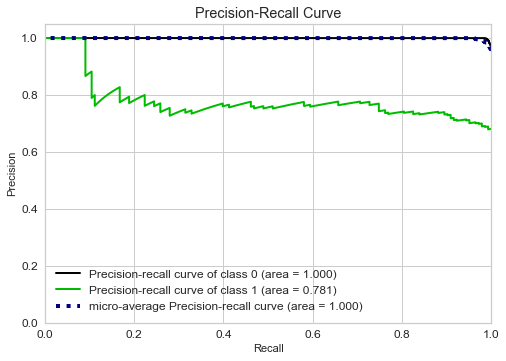

____________________________________
****** Cumulative gain: con metodo diretto *******


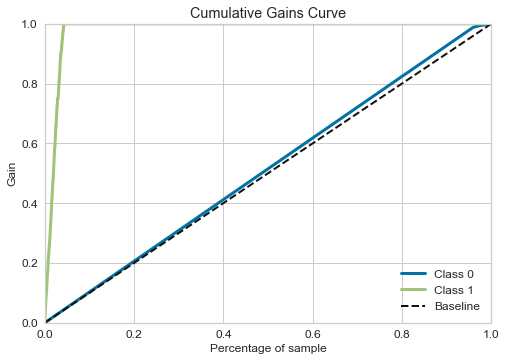

____________________________________
****** Lift curve: con metodo diretto *******


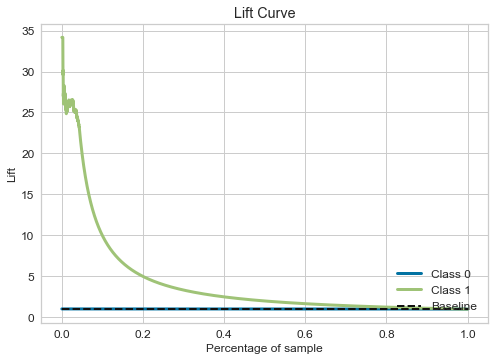

In [81]:
y_score = logReg.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

# Provo Ribilanciando tutto

In [84]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [85]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 15810, 1: 15810})


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify=y_res)

**** Matrice di Confusione *****
 True negative: 4723 False negative: 0
 True positive: 4743 False positive: 20
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9979
Numero di campioni correttamente correlati:  9466
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9958
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9958
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9979
____________________________________________
              precision    recall  f1-score   

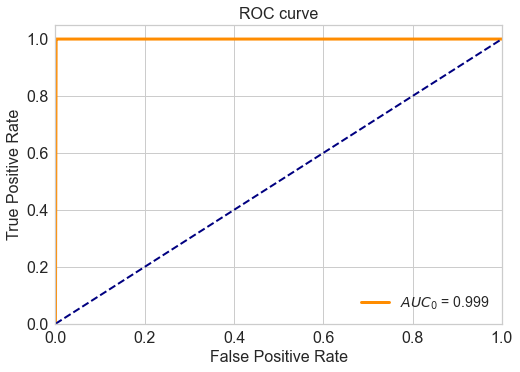

____________________________________
****** VALORE DI AUC *******
0.9992620704195657
____________________________________
****** ROC CURVE: con metodo diretto *******


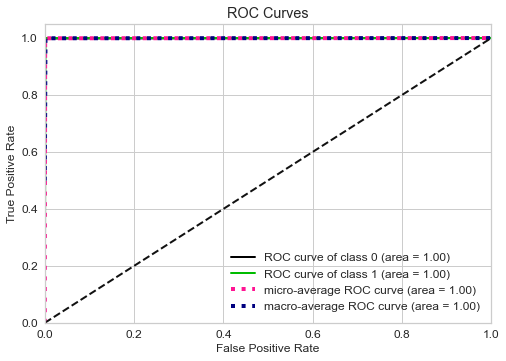

____________________________________
****** Precision recall: con metodo diretto *******


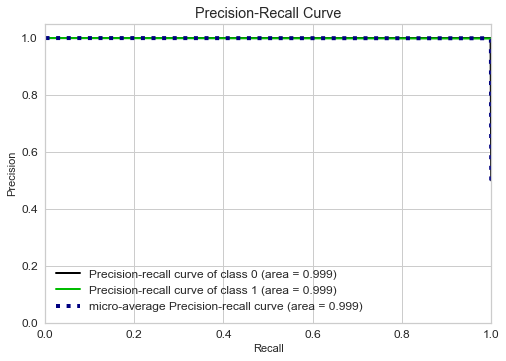

____________________________________
****** Cumulative gain: con metodo diretto *******


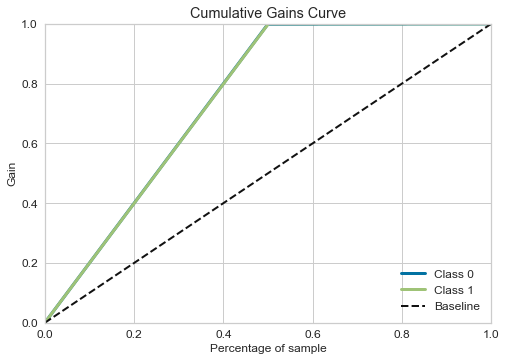

____________________________________
****** Lift curve: con metodo diretto *******


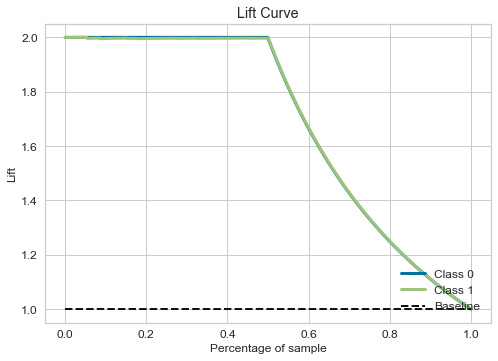

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
result_pred(y_test, y_pred)
y_score = knn.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

**** Matrice di Confusione *****
 True negative: 4069 False negative: 0
 True positive: 4743 False positive: 674
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9289
Numero di campioni correttamente correlati:  8812
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.8756
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8579
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9337
____________________________________________
              precision    recall  f1-score  

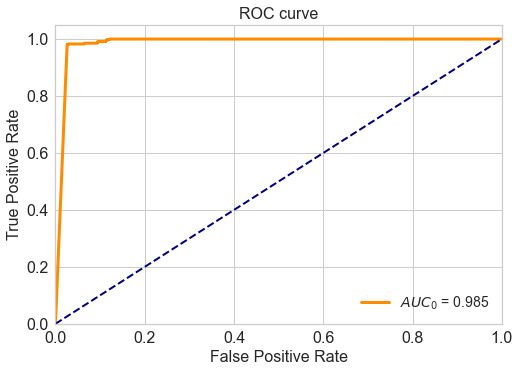

____________________________________
****** VALORE DI AUC *******
0.9853956576997144
____________________________________
****** ROC CURVE: con metodo diretto *******


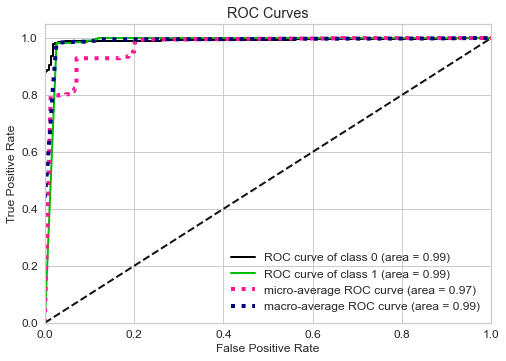

____________________________________
****** Precision recall: con metodo diretto *******


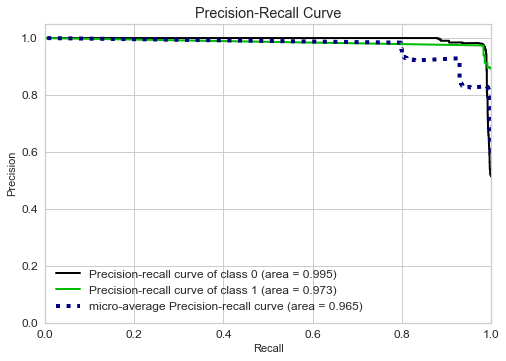

____________________________________
****** Cumulative gain: con metodo diretto *******


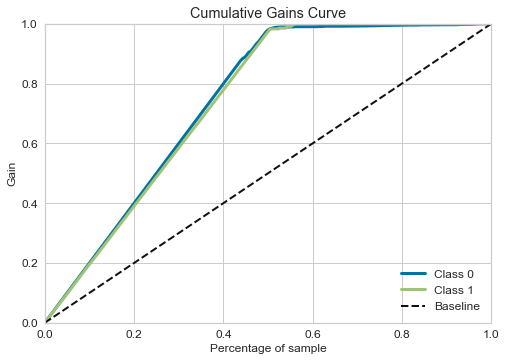

____________________________________
****** Lift curve: con metodo diretto *******


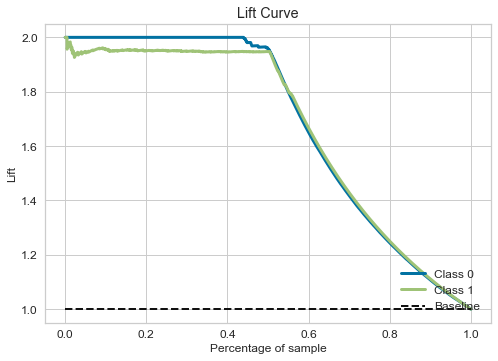

In [89]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
result_pred(y_test, y_pred)
y_score = gauss.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

**** Matrice di Confusione *****
 True negative: 4719 False negative: 0
 True positive: 4743 False positive: 24
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9975
Numero di campioni correttamente correlati:  9462
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9950
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9949
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9975
____________________________________________
              precision    recall  f1-score   

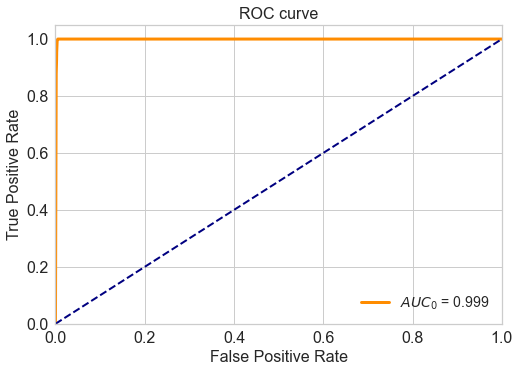

____________________________________
****** VALORE DI AUC *******
0.9989260780859787
____________________________________
****** ROC CURVE: con metodo diretto *******


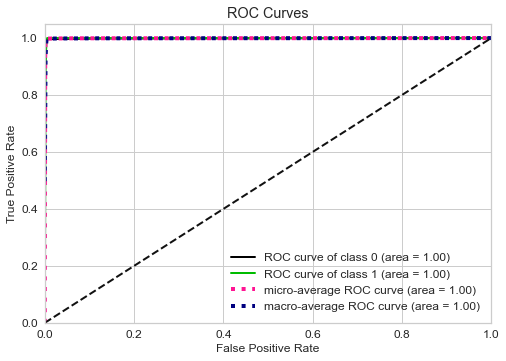

____________________________________
****** Precision recall: con metodo diretto *******


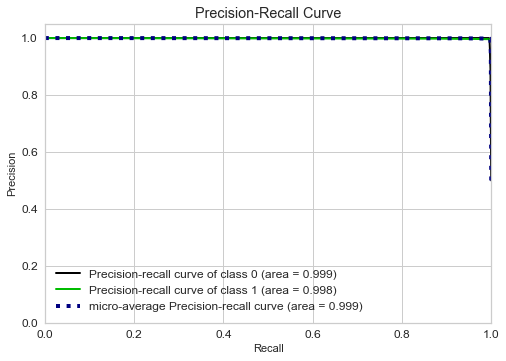

____________________________________
****** Cumulative gain: con metodo diretto *******


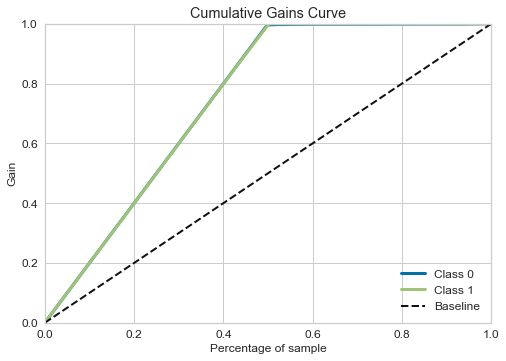

____________________________________
****** Lift curve: con metodo diretto *******


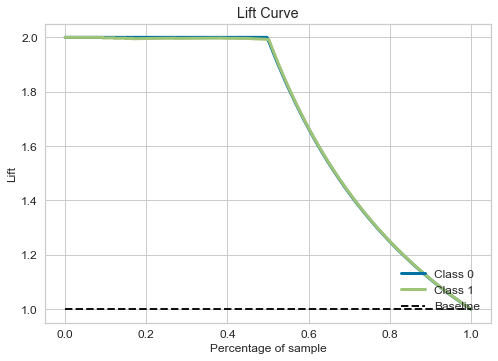

In [90]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result_pred(y_test, y_pred)
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

**** Matrice di Confusione *****
 True negative: 4682 False negative: 26
 True positive: 4717 False positive: 61
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9908
Numero di campioni correttamente correlati:  9399
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9872
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9945
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9871
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9909
____________________________________________
              precision    recall  f1-score  

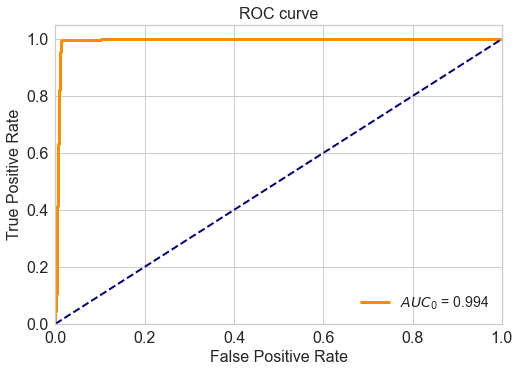

____________________________________
****** VALORE DI AUC *******
0.9940807828076833
____________________________________
****** ROC CURVE: con metodo diretto *******


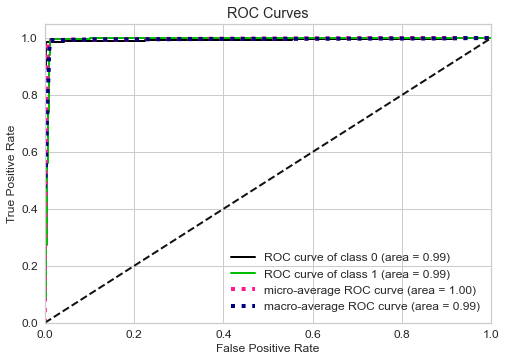

____________________________________
****** Precision recall: con metodo diretto *******


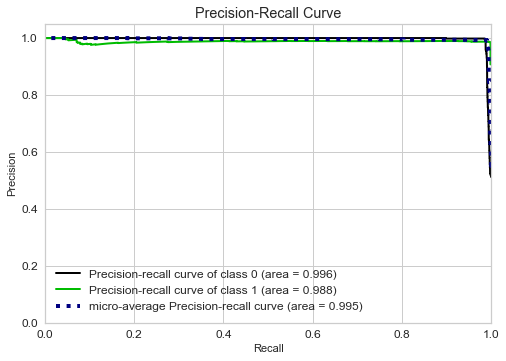

____________________________________
****** Cumulative gain: con metodo diretto *******


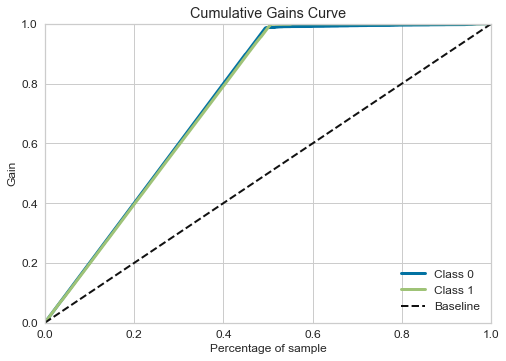

____________________________________
****** Lift curve: con metodo diretto *******


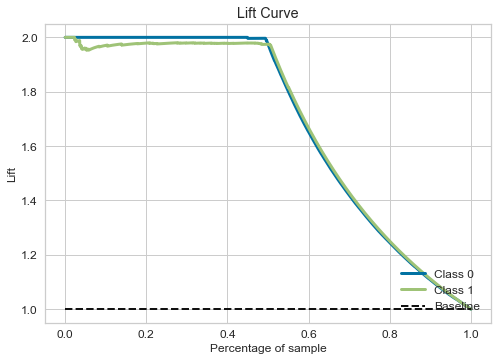

In [91]:
# penalty = 'l2', penalty = 'l1', penalty = 'l2', penalty = 'elasticnet'
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
result_pred(y_test, y_pred)
y_score = logReg.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)